<a href="https://colab.research.google.com/github/hshanes/cHW2/blob/main/chw_2_HANNAH_SHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/scaomath/wustl-math450/blob/main/Homework/chw-2_YOUR_NAME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Vectorization (`*` and `mm` in `torch` and `Linear` in `torch.nn`)
Name: Hannah Shanes

Wustlkey:hshanes
Partner Name (if applicable):

Partner Wustlkey (if applicable):

### Submission instructions

- Submit the modified python notebook as homework submission.
- Group submission is enabled, you can submit this coding assignment with up to 1 teammate in our class. For instruction of how to do a group submission. Please refer to Canvas useful links.
- Do not change the number of cells! Please work in the cell provided. If we need extra cells for debugging and testing purposes, we can work at the end of this notebook, save everything as a backup for review, and delete the extra cells in the submitted version.

 

### Instructions
Do **not** use `for` loops for computational purpose in any of our solutions! We are allowed to use `for` loops to display figures etc.
Efficieny will be graded as well. For example if a problem asks us generate an array from 0 to 9: then
```python
x = []
for i in range(10):
    x.append(i)
```
this will only result a partial credit while
```python
x = np.arange(10)
```
or
```python
x = torch.arange(10)
```
will yield a full score.

### Problems
Below are 4 problems that explore elementwise operations, matrix-vector multiplication, and the simplest layer in `torch.nn` module. Each problem gives examples demonstrating the concept and has an associated coding task. Complete the coding tasks for credit.

### Grading
This homework has 4 problems, 5 points each. The homework will be graded and the grade counts towards your course grade. 

## Coding environments and submission
If we do not have `torch` installed on your computer, we have three ways to upload this notebook to [Google colab](https://colab.research.google.com/)：

1. Open up Google Colab, choose `Upload` to upload this template and work there. After we have done working we can select `File->Download .ipynb`.
2. Open up Google Colab, choose either `GitHub` or `Google Drive` to select the uploaded notebook in the corresponding website. After done working, we can sync the file to the corresponding GitHub or Google Drive copy.
3. Use the "Open in Colab" button at the top.

In [1]:
# Run Me First
import numpy as np
import torch

## Dataset


"MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike."

In the following cells, we will learn how to load and view this dataset for our toy models. 

Read more:[https://www.kaggle.com/c/digit-recognizer](https://www.kaggle.com/c/digit-recognizer)


<a title="By Josef Steppan [CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0)], from Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img width="512" alt="MnistExamples" src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"/></a>


---- 
This code is adopted from the pytorch examples repository. 
It is licensed under BSD 3-Clause "New" or "Revised" License.
Source: https://github.com/pytorch/examples/
LICENSE: https://github.com/pytorch/examples/blob/master/LICENSE

In [2]:
# import torchvision 
from __future__ import print_function
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid


In [3]:
# import packages that help us plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [6]:
# download the data
train = datasets.MNIST('../data', train=True, download=True, transform = transforms.ToTensor())

In [7]:
# put the data into a loader, every iteration 1 sample is loaded
train_loader = DataLoader(train, batch_size=1, shuffle=True, num_workers=2,)

In [8]:
data_iter = iter(train_loader) # set the loader to be an iterator
images, labels = next(data_iter) # next returns the next item in an iterator

`image` is now a `28x28` matrix, with entries varying between 0 and 1. Once being plotted by `imshow` function as a `28x28` image, each pixel's brightness is decided by the matrix's entry value. Here axes are used but we can always just call `plt.imshow` instead.

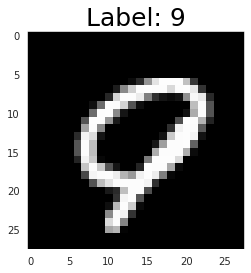

In [9]:
image = images[0].squeeze()
label = labels.squeeze()
_, ax = plt.subplots(1)
ax.imshow(image, cmap='gray'); 
ax.set_title(f'Label: {label}', color= 'black', fontsize=25);

## Data manipulation in higher dimensions

Load more images with label 8. 

In [10]:
idx = (train.train_labels==8)
labels_new = train.train_labels[idx]
data = train.train_data[idx]/255

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Now we randomly pick 10 of them using `numpy.random.choice` function, notice the shape of the data should be `(10, 28, 28)` whereas the dimension 0 (axis 0) represents the indices of the image.

In [11]:
n_data_all = len(data)
idx = np.random.choice(range(n_data_all), size=10)
data_new = data[idx]
data_new = torch.tensor(data_new, dtype=torch.float)
print(data_new.shape)

torch.Size([10, 28, 28])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


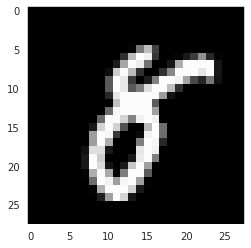

In [12]:
plt.imshow(data_new[0,:,:], cmap='gray'); # plot the first sample

## Problem 1

For `data_new`, get a smoothened 8 image `average_8` by averaging axis 0, use a single line of code to achieve the result of the following `for` loop:

```python
n_sample = len(data_new)
average_8 = torch.zeros_like(data_new[0], dtype=torch.float)
for i in range(n_sample):
    average_8 += data_new[i,:,:]/n_sample

```

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0290, 0.0706, 0.0996, 0.0996, 0.0996, 0.1000,
         0.0569, 0.0000, 0.0000, 0.0047, 0.0753, 0.0996

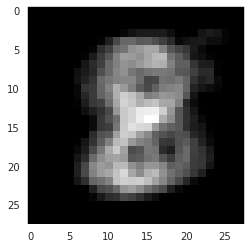

In [21]:
average_8 = torch.mean(data_new[:,:,:], dim=0)   # Replace this with your code
print(average_8)
try:
    plt.imshow(average_8, cmap='gray'); # this should look like a smoothened 8
except TypeError:
    print("Please get an averaged tensor first.")

## `torch.nn.Linear`

We know that the layer `Linear` is essentially applying a linear transform to every sample in the data. In the following example, a linear layer is initialized with no bias, transforms a flattened `28x28` matrix to a long vector of `14*14`, then reshape this vector back to `14x14` matrix.

If we plot this matrix, we will find that nothing is discernible anymore. This is the nature of the neural network, transforms "low-level" concrete features to more abstracted features. Even after being trained, nn retains this black-box nature.

In [17]:
import torch.nn as nn

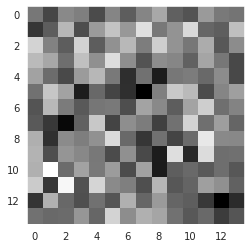

In [18]:
layer1 = nn.Linear(28*28, 14*14, bias=False)
x0 = data_new[0].flatten() # flatten (28, 28) matrix to a (784, ) vector
x1 = layer1(x0) # apply the linear transform
image = x1.view(14,14).detach().numpy() # reshape (196, ) vector to (14,14)
plt.imshow(image, cmap='gray'); 

Notice that `torch` layer can handle data in batch.

In [19]:
n_samples = len(data_new)
X0 = data_new.view(n_samples, -1) 
X1 = layer1(X0)
X2 = X1.view(-1,14,14) # -1 detects the batch size automatically
print(X2.size())

torch.Size([10, 14, 14])


## Problem 2
Implement in the following cell `nn.Linear` from scratch using `torch.mm` on `data_new` of a linear layer with out bias to achieve the result of the following `for` loop. The following `for` loop can be modified to three lines of code with a reshape using `view` function, a matrix-matrix multiplication, reshape using `view` again.

```python
W0 = torch.randn(28*28, 14*14)
n_samples = len(data_new)
X0 = data_new
X1 = torch.zeros(n_samples, 14*14, 1)
for i in range(n_samples):
    sample = X0[i,:,:].view(-1,1)
    X1[i,:] = W0.T.mm(sample)
X2 = X1.view(-1,14,14)

```

In [38]:
X0 = data_new.view(n_samples, -1) 
X1=X0.mm(W0)
X2 = X1.view(n_samples, 14, 14)   


print(X2.size()) # should be (10, 14, 14)

torch.Size([10, 14, 14])


## Downsampling, pooling, and padding

###  Examples
In practice of computer vision, an image is sometimes downsampled to reduce the dimension and the size of the neural network. We can do so by "pooling": for example, for an `28x28` image, we can "pool" it by taking the maximum of a `2x2` block to downsample an image from `28x28` to `14x14`.

An example can be viewed as follows:

<img width="512" alt="MnistExamples" src="https://sites.wustl.edu/scao/files/2021/02/MaxpoolSample2.png"/></a>

"Padding" is the operation of adding zeros on the outer rims of a matrix to make it bigger, it is useful in neural network to keep the size consistent. For example for the folllowing `2x2` matrix:
```
tensor ([[1 , 2],
         [3, 4]])

```
We can pad this matrix by zeros with a padding size 2 as follows:
```
tensor([[ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  2,  0,  0],
        [ 0,  0,  3,  4,  0,  0],
        [ 0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0]])
```



torch.Size([10, 14, 14])


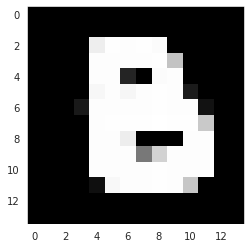

In [39]:
 # pool of square window of size=2, stride=2 as shown in the image above
 # size: the size of the square pooling window
 # stride: how many entries does the pooling window moves each time, if the stride is 1, then there is overlapping for a size 2 pooling window
 layer2 = nn.MaxPool2d(2, stride=2) 
 X0 = data_new
 X1 = layer2(X0)
 print(X1.size())
 plt.imshow(X1[1], cmap='gray'); 

## Problem 3

Fill in the following cell implementation a vectorized function to perform a zero-padding on the max-pooled data with size `(10,14,14)`, and transform each sample in it back to `(10,28,28)` without `for` loop.

torch.Size([10, 28, 28])


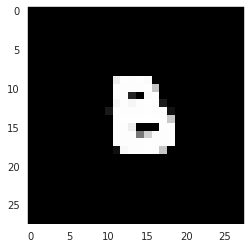

In [49]:
X=torch.zeros((10,28,28))
X[:,7:-7, 7:-7]=X1
X1_upsample = X

print(X1_upsample.size()) # (10, 28, 28)
plt.imshow(X1_upsample[1], cmap='gray'); # should be an eight

## `loss.backward()`

The `backward()` operation on any tensor `w` initialized with `requires_grad=True` will compute the gradient of `w`, and we can retrieve its gradient by `w.grad`. For example in the following cell, the gradient of $W^{T}$ is computed for 
$$
L = \frac{1}{20}\sum_{i=1}^{10} |W\boldsymbol{x}^{(i)} -y^{(i)} |^2
$$

In [61]:
torch.manual_seed(42)
n_samples = len(data_new)

# X[i] is a row vector representing a sample
X = torch.tensor(data_new.view(-1, 28*28), requires_grad=False) 

# y[i] is a made-up label for i-th sample
y = torch.randn((n_samples, 1), requires_grad=False)

# W is the weight matrix transposed 
W = torch.randn((28*28, 1), requires_grad=True)
L = 0.5*(X.mm(W) - y).square().mean()

# backprop
L.backward()

# gradient
with torch.no_grad():
    gradW = W.grad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [62]:
print(W.size(), gradW.size()) # gradW has sample shape with W

torch.Size([784, 1]) torch.Size([784, 1])


## Problem 4

Fill in the following cell an implementation of the backpropagation to compute
$$ 
\frac{\partial L}{ \partial (W^T)} = \frac{1}{10} \sum_{i=1}^{10} 
(W\boldsymbol{x}^{(i)} -y^{(i)}) * \boldsymbol{x}^{(i)}
$$ 
using explicitly the matrix-vector multiplication `mm` and elementwise multiplication `*`. Then verify that the explicitly computed backpropagation gradient coincides with the `gradW` above.

Caveat: we may want to pay attention to the sizes of the vector being either `(28*28, )` or `(28*28, 1)`.

In [65]:
with torch.no_grad():
    gradW1 = (1/10)*torch.sum((X.mm(W)-y)*X, dim=0)
    gradW1 = gradW1.view(-1,1)

print(torch.norm(gradW1-gradW)) # this should be less than 1e-5 (single-precision error margin)

tensor(1.4696e-06)
